<h1 style='color: green; text-align: center; font-size: 2.6em;'>Campanha de Marketing</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

<h2 style='color: green; text-align: center; font-size: 2em;'>Data Understanding</h2>

In [2]:
df = pd.read_csv('superstore_data.csv')
print(f"O dataset tem {df.shape[0]} linhas e {df.shape[1]} colunas.")
df.head()

O dataset tem 2240 linhas e 22 colunas.


,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

<p style='font-size: 13px; font-family: Andale Mono, Verdana, sans-serif;'>The <strong style='color: green;'>Coluna 'Income'</strong> é a única que possui valores nulos, e o tipo da <strong style='color: green;'>coluna 'Dt_Customer'</strong> deve ser do tipo data e não objeto.</p>

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


<p style='font-size: 13px; font-family: Andale Mono, Verdana, sans-serif;'>Algumas coluna tem alguns outliers como por exemplo a coluna <strong style='color: green;'>'Income'</strong> e colunas que representam o valor gasto em determinados tipos de produtos, como <strong style='color: green;'>'MntMeatProducts'</strong> e <strong style='color: green;'>'MntWines'</strong>.</p>
<p style='font-size: 13px; font-family: Andale Mono, Verdana, sans-serif;'>Esses valores atípicos podem atrapalhar nosso modelo.</p>

<h2 style='color: green; text-align: center; font-size: 2em;'>Data Preparation e EDA</h2>
<h3 style='color: #1fd655; text-align: left; font-size: 1.7em;'>Data Preparation</h3>

In [5]:
# substituindo o tipo de coluna 'Dt_Customer'.

df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer).dt.to_period('M')

In [6]:
df.Dt_Customer.sort_values()

2239    2012-01
738     2012-01
1375    2012-01
1398    2012-01
1435    2012-01
         ...   
504     2014-12
479     2014-12
478     2014-12
950     2014-12
52      2014-12
Name: Dt_Customer, Length: 2240, dtype: period[M]

In [7]:
# verificando os valores nulos da coluna 'Income'

df[df.Income.isnull()]

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
134,8996,1957,PhD,Married,NaN,2,1,2012-11,4,230,...,49,37,53,12,7,2,8,9,0,0
262,1994,1983,Graduation,Married,NaN,1,0,2013-11,11,5,...,0,2,1,1,1,0,2,7,0,0
394,3769,1972,PhD,Together,NaN,1,0,2014-02,17,25,...,0,0,3,1,1,0,3,7,0,0
449,5255,1986,Graduation,Single,NaN,1,0,2013-02,19,5,...,3,263,362,0,27,0,0,1,0,0
525,8268,1961,PhD,Married,NaN,0,1,2013-11,23,352,...,10,0,15,3,6,1,7,6,0,0
590,10629,1973,2n Cycle,Married,NaN,1,0,2012-09,25,25,...,17,4,17,3,3,0,3,8,0,0
899,10475,1970,Master,Together,NaN,0,1,2013-01,39,187,...,26,20,14,2,4,2,6,5,0,0
997,9235,1957,Graduation,Single,NaN,1,1,2014-05,45,7,...,2,0,1,1,1,0,2,7,0,0
1096,4345,1964,2n Cycle,Single,NaN,1,1,2014-12,49,5,...,2,0,4,1,1,0,2,7,0,0
1185,7187,1969,Master,Together,NaN,1,1,2013-05,52,375,...,94,66,96,7,4,10,4,3,0,0


In [8]:
# atribuindo a mediana aos valores nulos da coluna 'Income'

df.loc[df.Income.isnull(), 'Income'] = np.nanmedian(df.Income)

<p style='font-size: 13px; font-family: Andale Mono, Verdana, sans-serif;'>Agora podemos gerar insights para verificar valores discrepantes.</p>

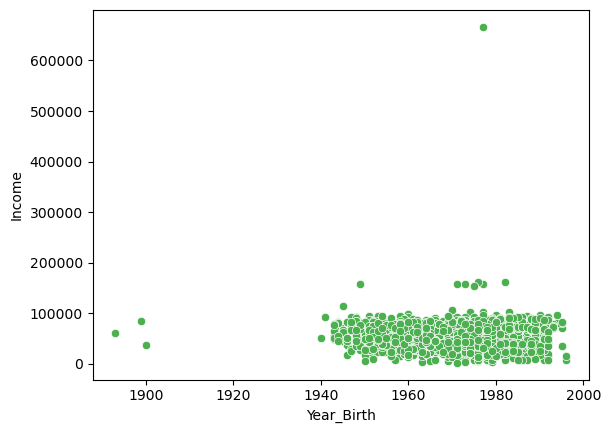

In [9]:
fig, ax = plt.subplots()

sns.scatterplot(df, x='Year_Birth', y='Income', ax=ax, color='#4CAF50')

plt.show()

In [10]:
df[df.Year_Birth <= 1900]

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
513,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05,23,8,...,7,0,2,1,1,0,2,4,0,0
827,1150,1899,PhD,Together,83532.0,0,0,2013-09,36,755,...,104,64,224,1,4,6,4,1,0,0
2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09,99,15,...,7,4,25,1,2,1,2,5,0,1


<ul>
    <li><p style='font-size: 13px; font-family: Andale Mono, Verdana, sans-serif;'>Há um <strong style='color: green;'>intervalo de tempo significativo entre 1900 e 1940</strong> na coluna 'Birth_Year' sem nenhum valor. Além disso, existem <strong style='color: green;'>apenas 3 clientes que nasceram antes de 1901</strong>. Esses valores são, sem dúvida, outliers e existe a possibilidade de ter ocorrido um erro de entrada de dados nesses casos.</p></li>
    <br>
    <li><p style='font-size: 13px; font-family: Andale Mono, Verdana, sans-serif;'>E há um valor na coluna 'Income' que <strong style='color: green;'>se desvia significativamente</strong> do padrão esperado.</p></li>
    <br>
    <li><p style='font-size: 13px; font-family: Andale Mono, Verdana, sans-serif;'>Esses valores em ambas as colunas devem ser tratados para evitar que influenciem negativamente nossas análises e, mais importante, nosso modelo.</p></li>
</ul>

In [11]:
# excluindo essas amostras

df.drop(df.index[df.Year_Birth <= 1900], inplace=True)
df.drop(df.index[df.Income > 300000], inplace=True)

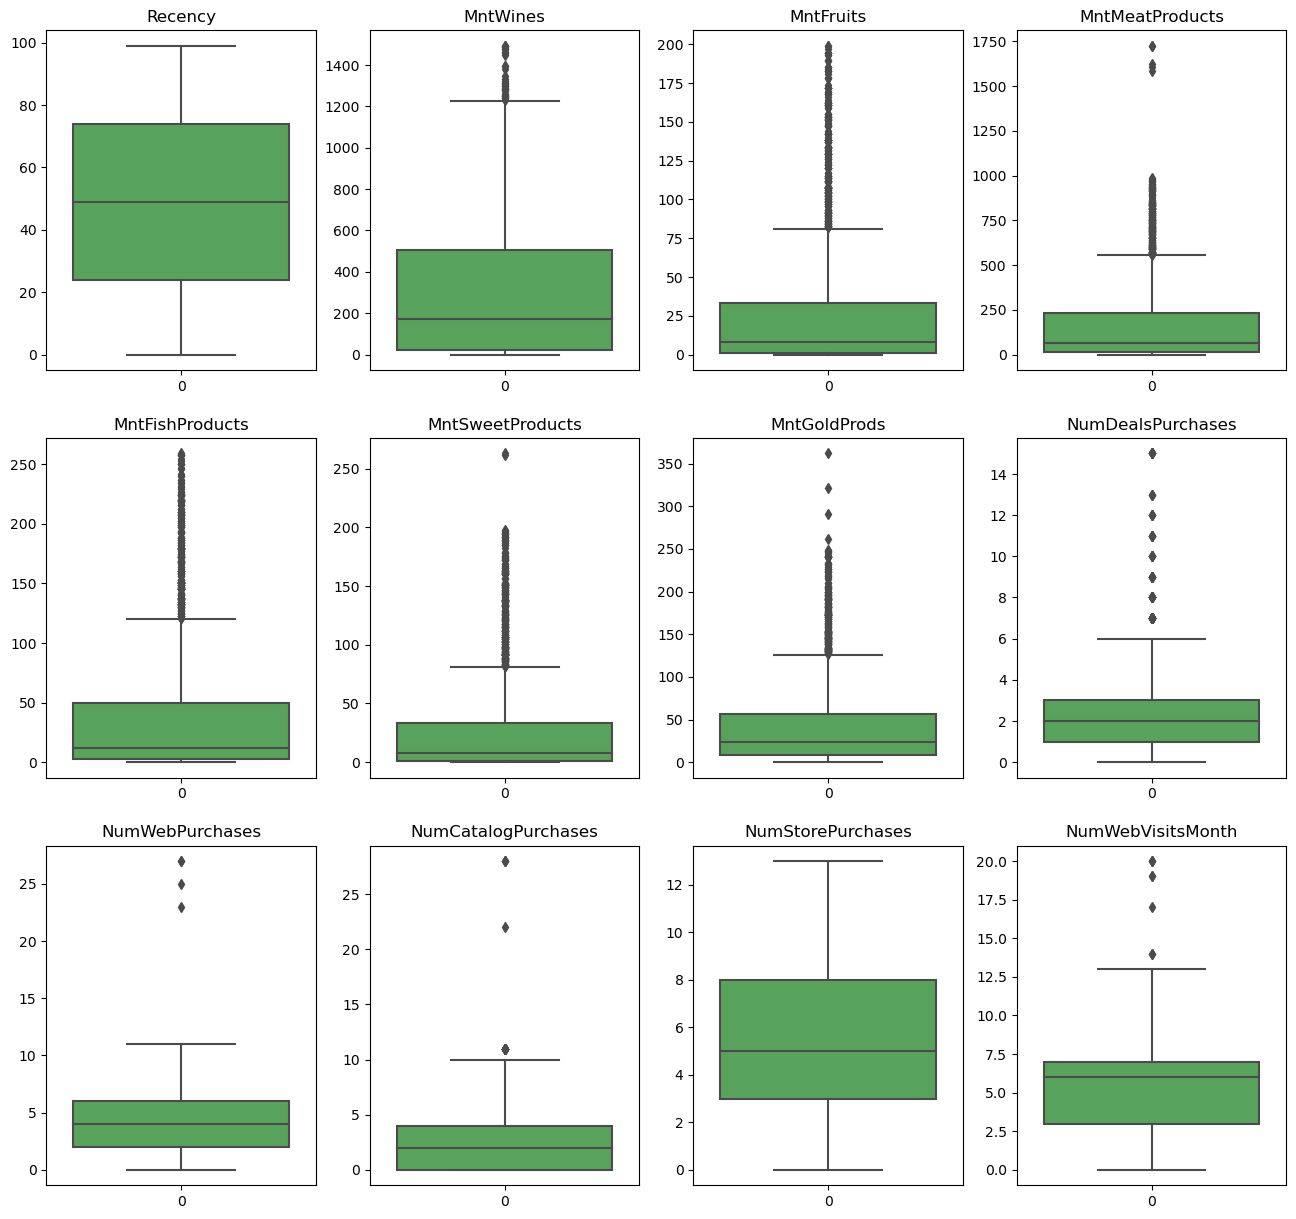

In [12]:
list_boxplots = ['Recency','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(16, 15))

cont = 0
for i in range(3):
    for j in range(4):
        sns.boxplot(df[list_boxplots[cont]], ax=ax[i][j], color='#4CAF50')
        ax[i][j].set_title(list_boxplots[cont])
        cont = cont + 1

<p style='font-size: 13px; font-family: Andale Mono, Verdana, sans-serif;'>Existem colunas que têm alguns valores discrepantes, e outras que têm ainda mais.</p>
<p style='font-size: 13px; font-family: Andale Mono, Verdana, sans-serif;'>Vamos remover essas amostras que têm valores discrepantes mais distantes.</p>

In [13]:
df.drop(df.index[df.MntMeatProducts > 1200], inplace=True)
df.drop(df.index[df.MntSweetProducts > 240], inplace=True)
df.drop(df.index[df.MntGoldProds > 270], inplace=True)

In [14]:
df.shape

(2227, 22)

<p style='font-size: 13px; font-family: Andale Mono, Verdana, sans-serif;'><strong style='color: green;'>Treze amostras foram removidas em comparação com o conjunto de dados original.</strong></p>
<p style='font-size: 13px; font-family: Andale Mono, Verdana, sans-serif;'>Agora, podemos realizar nossas análises exploratórias de dados sem nos preocuparmos com valores discrepantes extremos.</p>
<h3 style='color: #1fd655; text-align: left; font-size: 1.7em;'>EDA</h3>

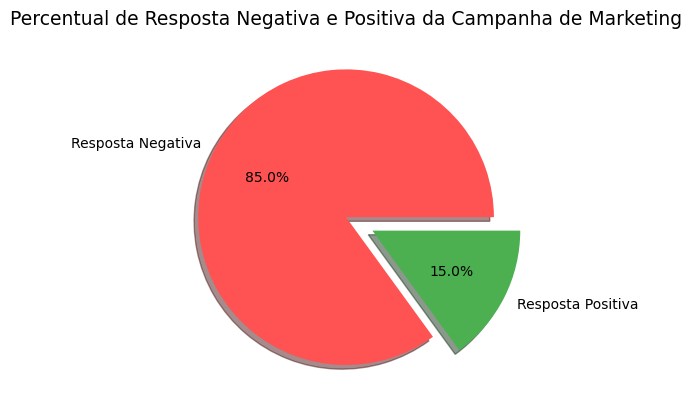

In [15]:
fig, ax = plt.subplots()

ax.pie(
    df.Response.value_counts().values,
    labels=["Resposta Negativa","Resposta Positiva"],
    autopct="%1.1f%%",
    explode=(0, 0.2),
    shadow=True,
    colors=['#FF5252', '#4CAF50']
)

ax.set_title("Percentual de Resposta Negativa e Positiva da Campanha de Marketing", fontsize=13.5)

plt.show()

<p style='font-size: 13px; font-family: Andale Mono, Verdana, sans-serif;'>Nosso conjunto de dados sofre com <strong style='color: green;'>classes desequilibradas</strong>, com apenas 15% dos clientes fornecendo uma resposta positiva. Antes de modelar, precisamos equilibrar os dados para evitar favorecer a classe majoritária.</p>

In [16]:
response_date = df.groupby('Dt_Customer')['Response'].mean().reset_index()
response_date['Dt_Customer'] = response_date.Dt_Customer.astype(str)

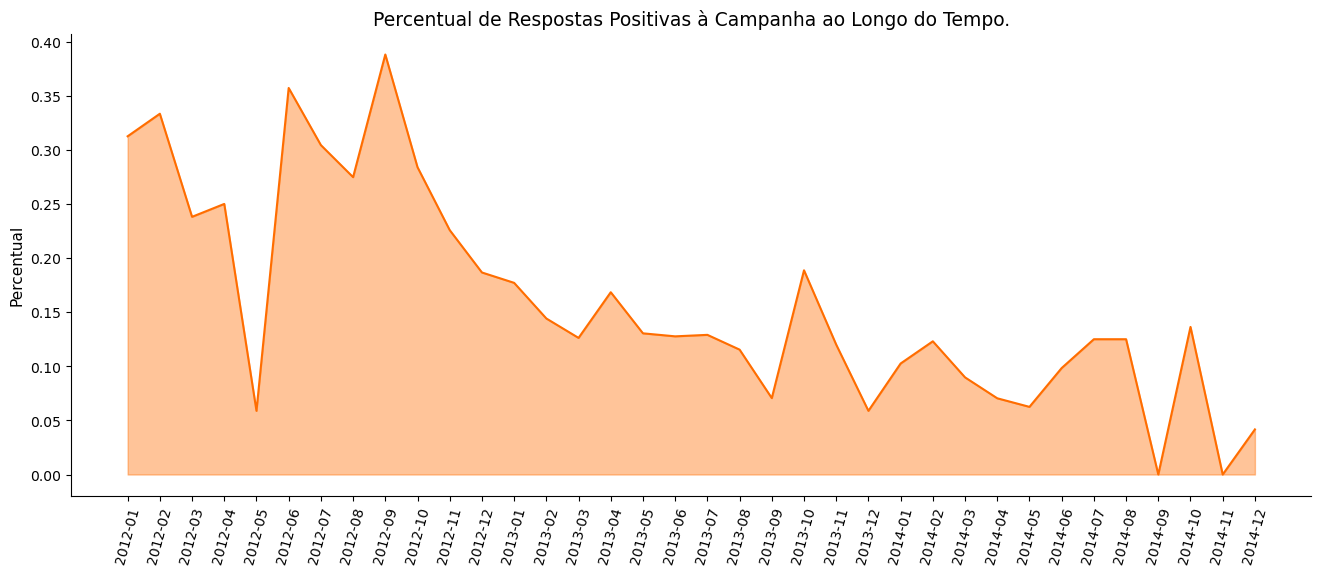

In [17]:
fig, ax = plt.subplots(figsize=(16, 6))

plt.plot(response_date['Dt_Customer'], response_date['Response'], color='#ff6d00')
plt.fill_between(response_date['Dt_Customer'], response_date['Response'], color='#ff6d00', alpha=0.4)

ax.tick_params(axis='x', rotation=75)
ax.spines[['top', 'right']].set_visible(False)

ax.set_title('Percentual de Respostas Positivas à Campanha ao Longo do Tempo.', fontsize=13.5)
ax.set_ylabel('Percentual', fontsize=11)

plt.show()

<p style='font-size: 13px; font-family: Andale Mono, Verdana, sans-serif;'>É possível observar que <strong style='color: green;'>clientes antigos</strong> têm maior probabilidade de fornecer uma resposta positiva à campanha em comparação com novos clientes.</p>

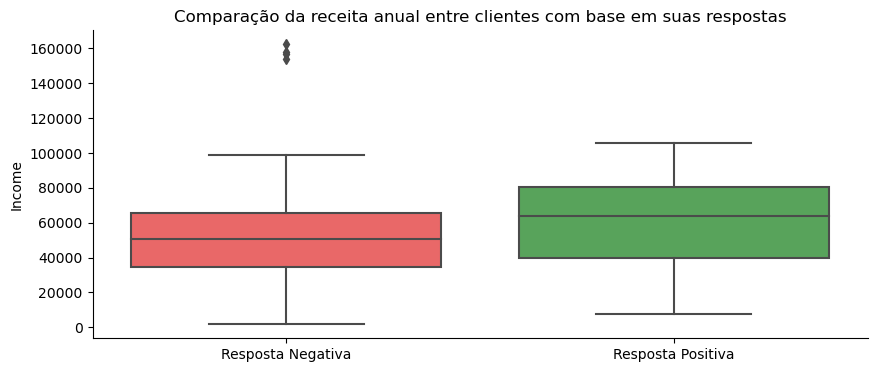

In [18]:
fig, ax = plt.subplots(figsize=(10, 4))

sns.boxplot(df, x='Response', y='Income', ax=ax, palette=['#FF5252', '#4CAF50'])

ax.spines[['top', 'right']].set_visible(False)
ax.set_title('Comparação da receita anual entre clientes com base em suas respostas', fontsize=12)

ax.set_xticklabels(['Resposta Negativa', 'Resposta Positiva'])
ax.set_xlabel('')

plt.show()

<p style='font-size: 13px; font-family: Andale Mono, Verdana, sans-serif;'>Podemos observar que os clientes que fornecem uma resposta positiva <strong style='color: green;'>têm uma renda anual mais alta.</strong></p>

In [19]:
categorical_cols = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain']

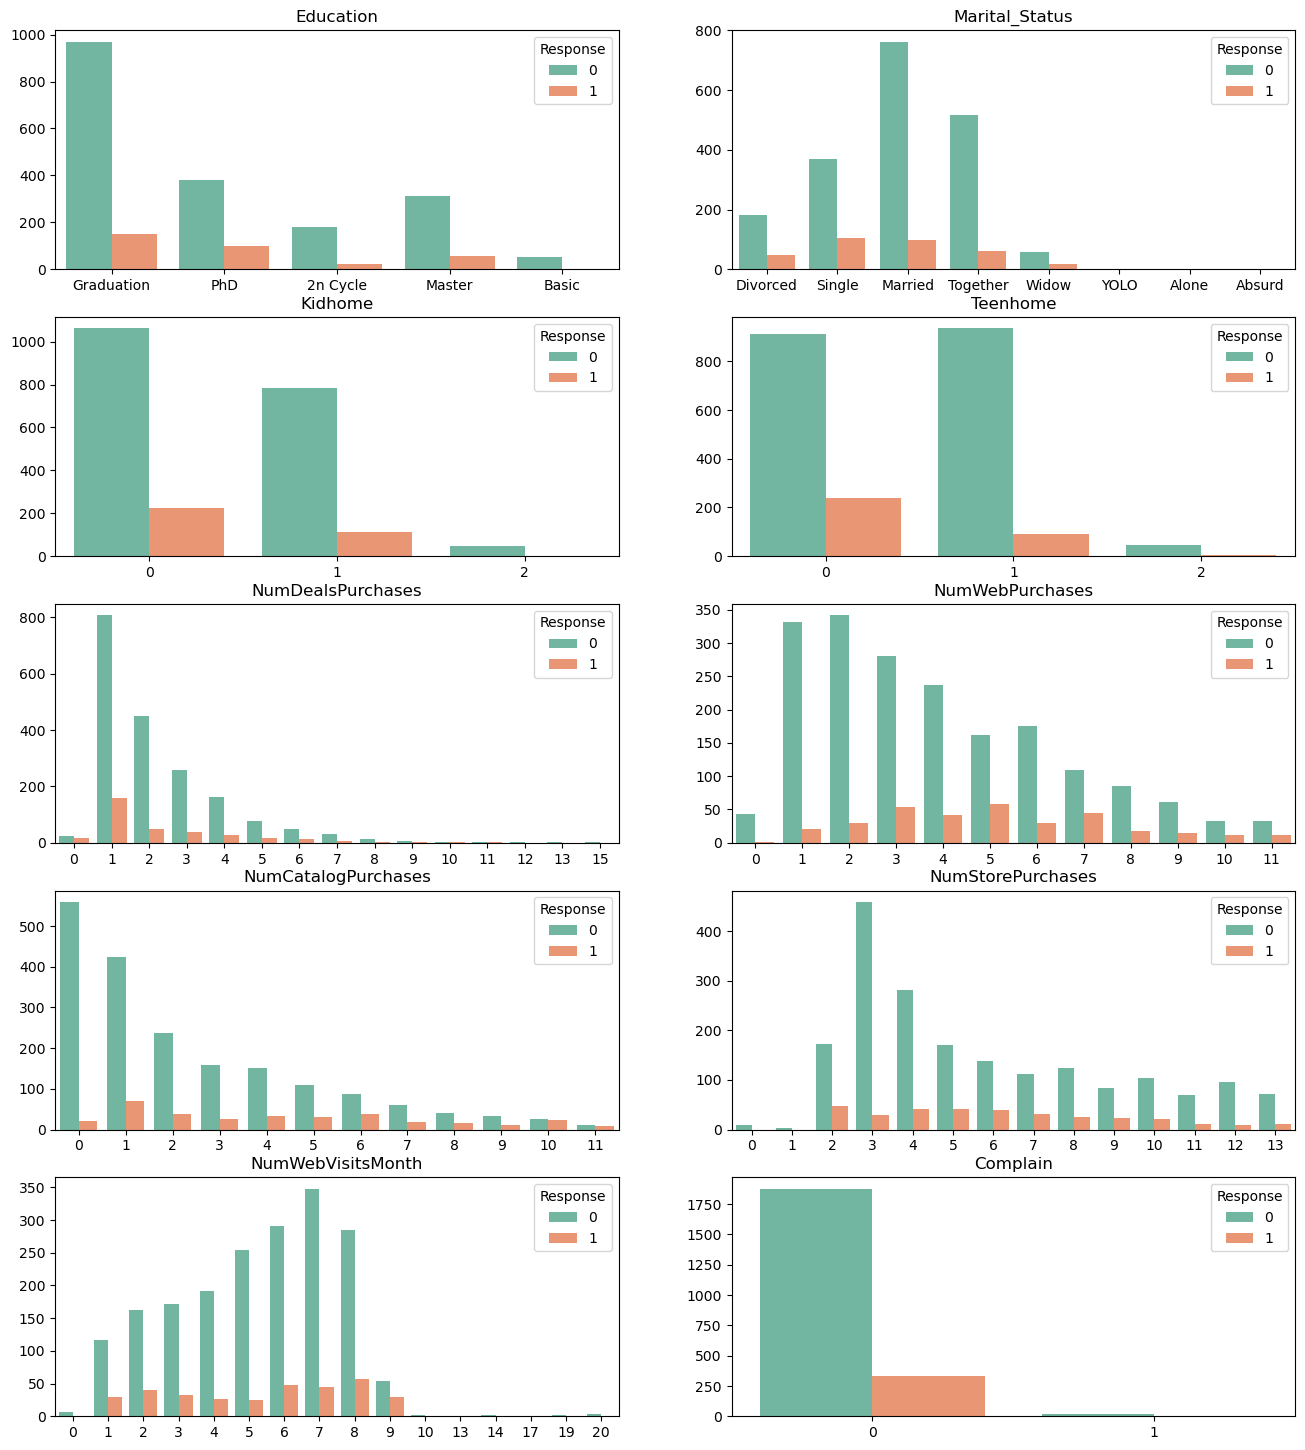

In [20]:
fig, ax = plt.subplots(ncols=2, nrows=5, figsize=(16, 18))

cont = 0
for i in range(5):
    for j in range(2):
        sns.countplot(df, x=categorical_cols[cont], hue='Response', ax=ax[i][j], palette='Set2')
        
        ax[i][j].set_title(categorical_cols[cont])
        ax[i][j].set_ylabel('')
        ax[i][j].set_xlabel('')
        
        cont = cont + 1
        
plt.show()

<p style='font-size: 13px; font-family: Andale Mono, Verdana, sans-serif;'><strong style='color: green;'>Comparando a Resposta com as Variáveis Categóricas...</strong></p>
<ul>
    <li>À medida que o número de compras, tanto por meio do catálogo quanto na loja física e online, aumenta, a porcentagem de clientes que respondem positivamente à campanha também aumentará.</li>
</ul>


In [21]:
continuous_cols = ['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']

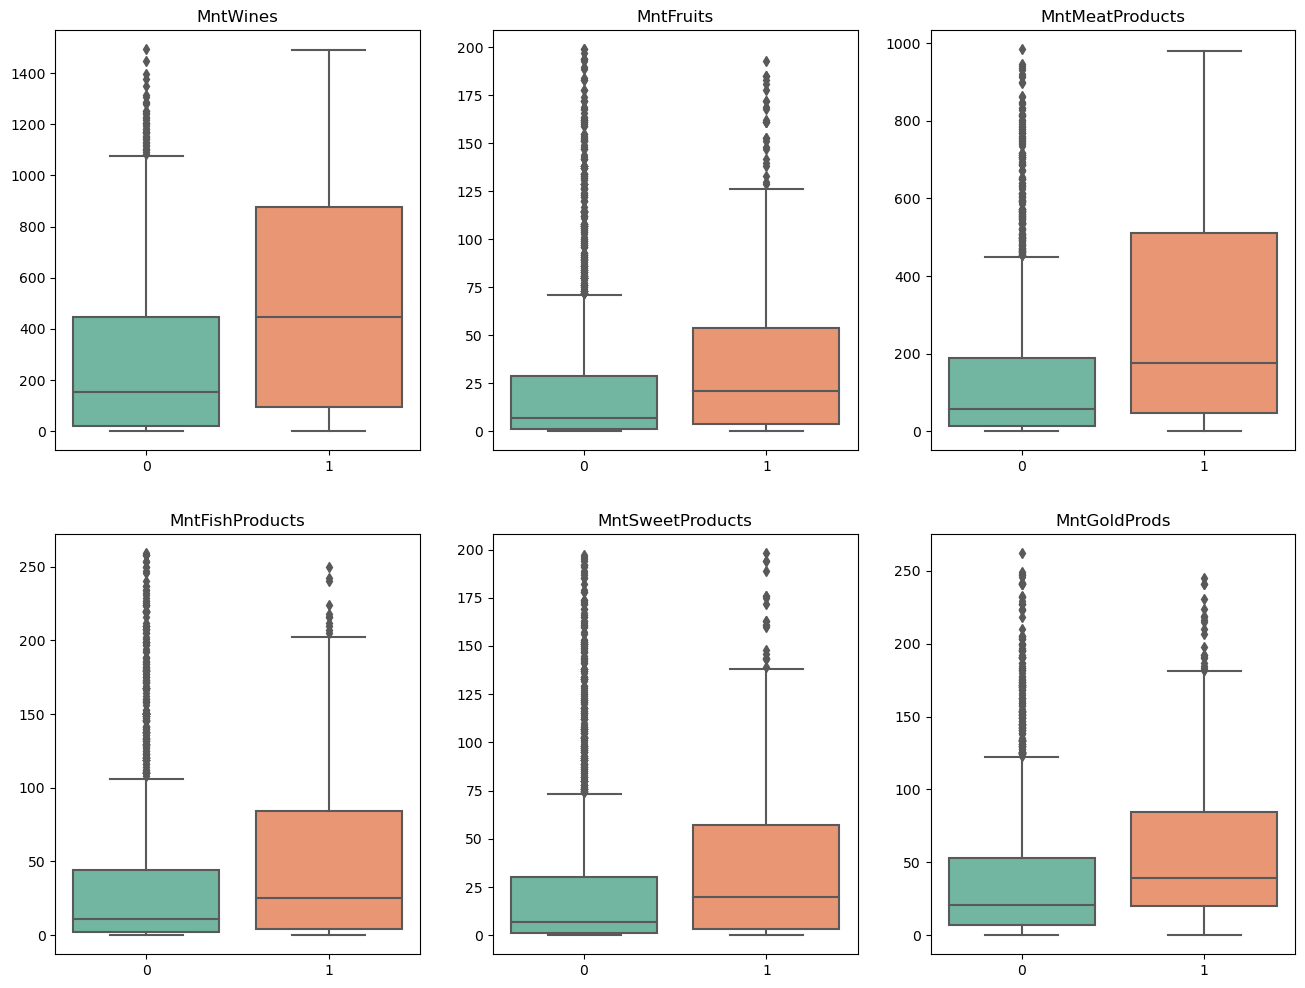

In [22]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(16, 12))

cont = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(df, y=continuous_cols[cont], x='Response', ax=ax[i][j], palette='Set2')
        
        ax[i][j].set_title(continuous_cols[cont])
        ax[i][j].set_ylabel('')
        ax[i][j].set_xlabel('')
        
        cont = cont + 1
        
plt.show()

<p style='font-size: 13px; font-family: Andale Mono, Verdana, sans-serif;'><strong style='color: green;'>Comparando a Resposta com as Variáveis Contínuas...</strong></p>

<ul>
    <li><p style='font-size: 13px; font-family: Andale Mono, Verdana, sans-serif;'>À medida que os clientes compram mais desses produtos, a probabilidade de responderem positivamente à campanha aumenta.</p></li>
</ul>

<h2 style='color: green; text-align: center; font-size: 2em;'>Preprocessing and Modeling</h2>

<h3 style='color: #1fd655; text-align: left; font-size: 1.7em;'>Preprocessing</h3>

In [23]:
# convertendo a coluna de data em números inteiros.

sorted_dt = sorted([str(val) for val in df.Dt_Customer.unique()])

df['Dt_Customer'] = df.Dt_Customer.apply(lambda val: sorted_dt.index(str(val)))

In [24]:
# excluindo a coluna 'Id'

df.drop('Id', axis=1, inplace=True)

In [25]:
df = pd.get_dummies(df)

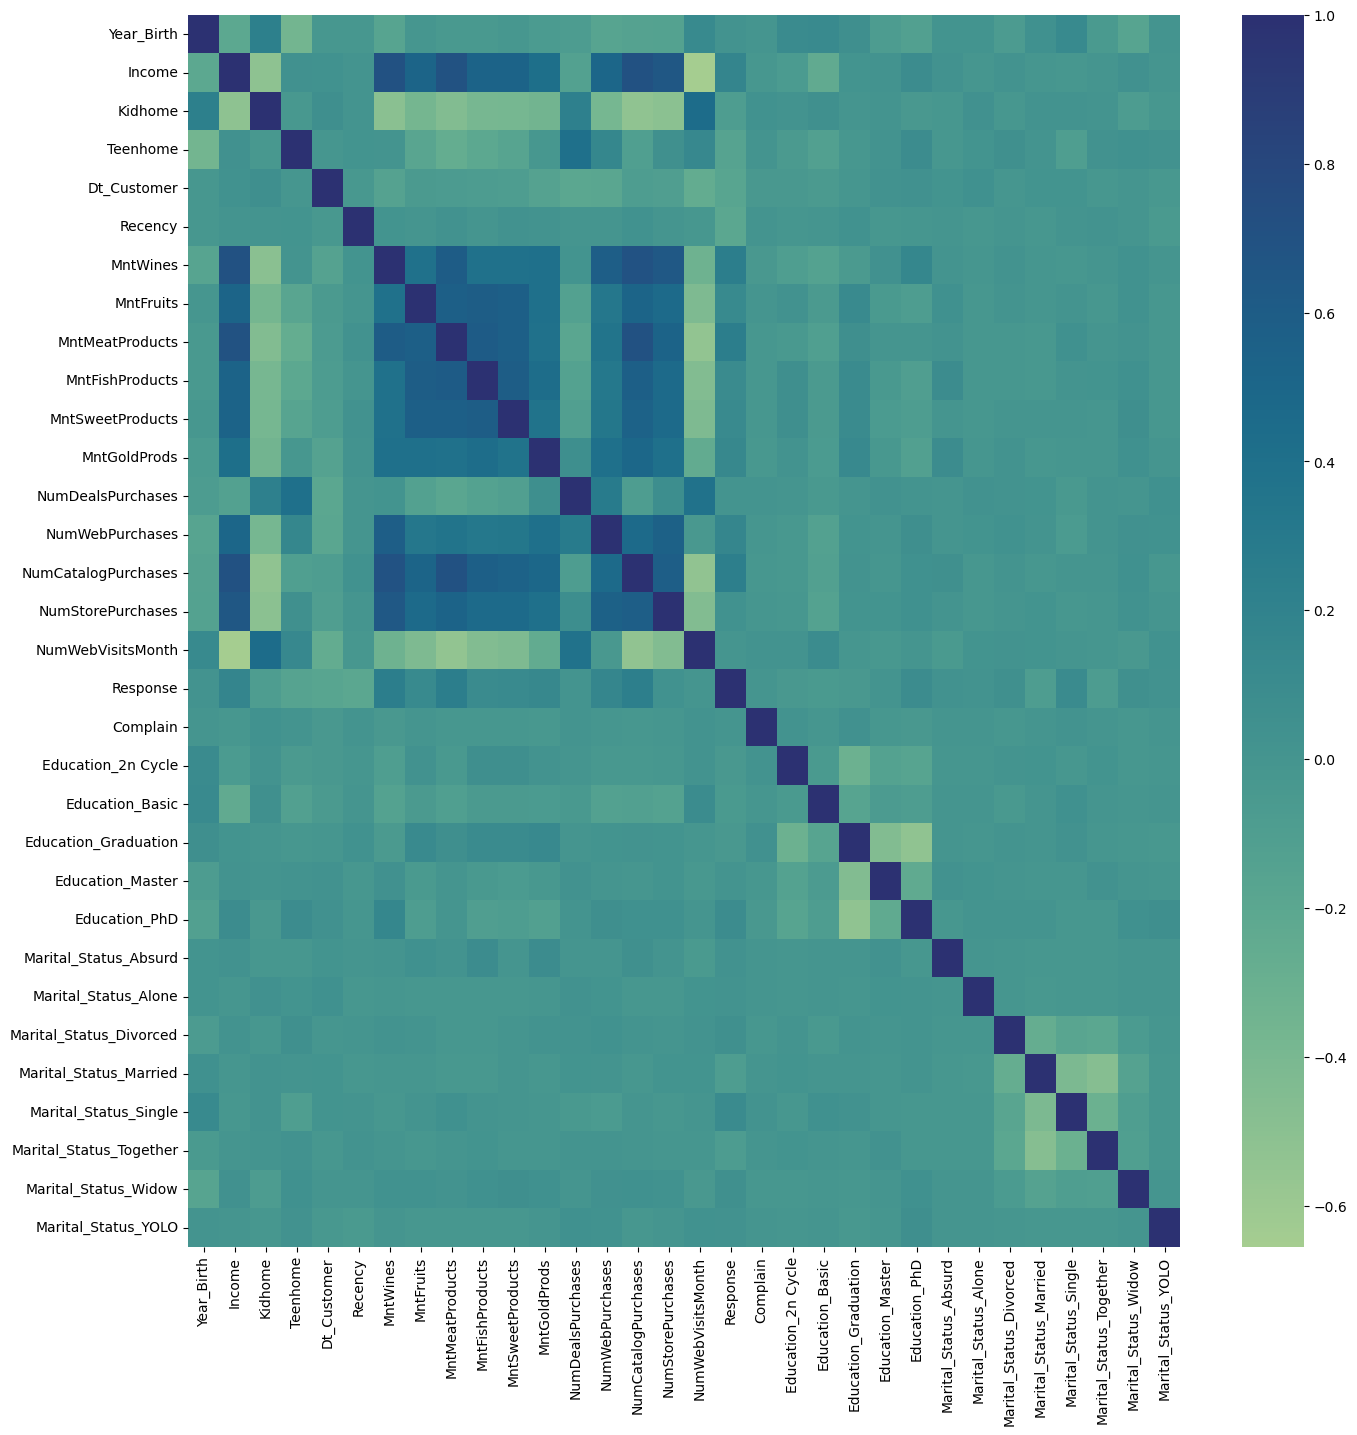

In [26]:
fig, ax = plt.subplots(figsize=(16, 16))

sns.heatmap(df.corr(), ax=ax, cmap='crest')

plt.show()

<p style='font-size: 13px; font-family: Andale Mono, Verdana, sans-serif;'><strong style='color: green;'>Agora, precisamos:</strong></p>

<ul>
    <li><p style='font-size: 13px; font-family: Andale Mono, Verdana, sans-serif;'>Padronizar os dados</p></li>
    <li><p style='font-size: 13px; font-family: Andale Mono, Verdana, sans-serif;'>Balancear os dados</p></li>
    <li><p style='font-size: 13px; font-family: Andale Mono, Verdana, sans-serif;'>E dividir os dados em conjuntos de treinamento e teste</p></li>
</ul>

In [27]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

In [28]:
X = df.drop('Response', axis=1)
y = df.Response

X.shape, y.shape

((2227, 31), (2227,))

In [29]:
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X)

In [30]:
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X, y)

X_resampled.shape, y_resampled.shape

((3786, 31), (3786,))

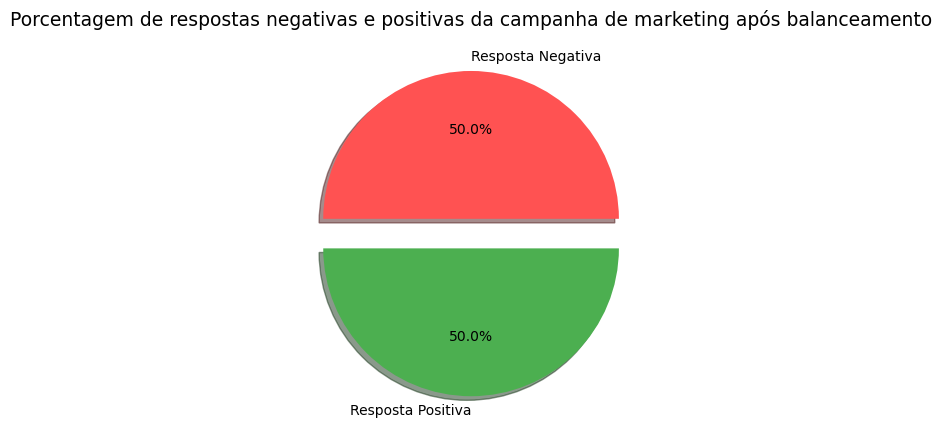

In [31]:
fig, ax = plt.subplots()

ax.pie(
    y_resampled.value_counts().values,
    labels=["Resposta Negativa","Resposta Positiva"],
    autopct="%1.1f%%",
    explode=(0, 0.2),
    shadow=True,
    colors=['#FF5252', '#4CAF50']
)

ax.set_title('Porcentagem de respostas negativas e positivas da campanha de marketing após balanceamento', fontsize=13.5)

plt.show()

<p style='font-size: 13px; font-family: Andale Mono, Verdana, sans-serif;'>Agora que nosso conjunto de dados está balanceado, podemos dividir os dados em conjuntos de treinamento e teste.</p>

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, 
                                                    stratify=y_resampled, test_size=0.2, random_state=12)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3028, 31), (758, 31), (3028,), (758,))

In [33]:
y_train.value_counts()

Response
0    1514
1    1514
Name: count, dtype: int64

<h2 style='color: green; text-align: left; font-size: 2em; text-align: center'>Modeling and Evaluation</h3>

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [35]:
kf = KFold(n_splits=5, shuffle=True, random_state=12)

In [36]:
models_evaluation = pd.DataFrame({
    'Model': [], 
    'Precision': [],
    'Recall': [],
    'Accuracy': []
})

In [37]:
def concat_evaluations(df, y_pred, model):
    new_model = pd.DataFrame({
        'Model': [model],
        'Precision': [precision_score(y_pred=y_pred, y_true=y_test)],
        'Recall': [recall_score(y_pred=y_pred, y_true=y_test)],
        'Accuracy': [accuracy_score(y_pred=y_pred, y_true=y_test)]
    })
    
    models_evaluation = pd.concat([df, new_model], axis=0, ignore_index=True)
    
    return models_evaluation

<h3 style='color: #1fd655; text-align: left; font-size: 1.35em;'>Decision Tree</h3>

In [38]:
tree_params = {
    'criterion': ["gini", "entropy"],
    'splitter': ["best", "random"],
    'min_samples_split': [2, 3, 5]
}

In [39]:
clf_tree = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=tree_params,
    scoring='accuracy',
    cv=kf
)

clf_tree.fit(X_train, y_train)

print(f"Melhores hiperparâmetros da Árvore de Decisão: \n{clf_tree.best_estimator_}")

Melhores hiperparâmetros da Árvore de Decisão: 
DecisionTreeClassifier()


In [40]:
scores_tree = cross_val_score(clf_tree, X_train, y_train, cv=kf, scoring='accuracy')

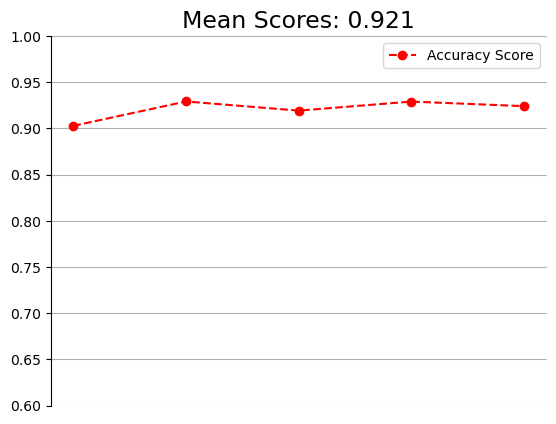

In [41]:
fig, ax = plt.subplots()

ax.plot(scores_tree, 'o--r', label='Accuracy Score')

ax.set_title(f'Mean Scores: {np.mean(scores_tree):.3f}', fontsize=17)

ax.spines[['top', 'right', 'bottom']].set_visible(False)
ax.set_ylim(0.6, 1)
ax.xaxis.set_visible(False)
ax.legend()

plt.grid()
plt.show()

In [42]:
y_pred_tree = clf_tree.predict(X_test)

In [43]:
cm_tree = confusion_matrix(y_pred=y_pred_tree, y_true=y_test)

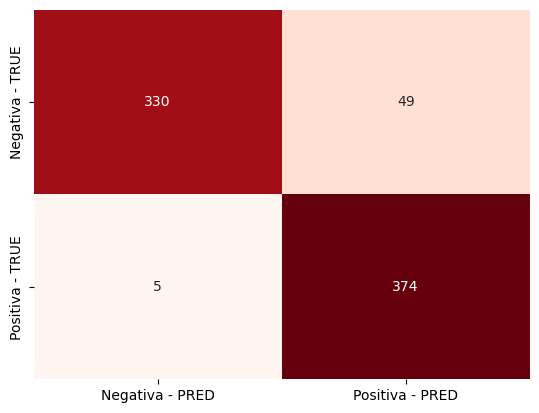

In [44]:
fig, ax = plt.subplots()

sns.heatmap(cm_tree, ax=ax, cmap='Reds', annot=True, fmt='g', cbar=False,
            xticklabels=['Negativa - PRED', 'Positiva - PRED'],
            yticklabels=['Negativa - TRUE', 'Positiva - TRUE'])

plt.show()

In [45]:
models_evaluation = concat_evaluations(models_evaluation, y_pred_tree, 'DecisionTree')

<h3 style='color: #1fd655; text-align: left; font-size: 1.35em;'>Logistic Regression</h3>

In [46]:
lr_params = {
    "penalty": ['l1', 'l2'],
    "C": [0.01, 0.1, 1, 10],
    "solver": ['saga', 'liblinear']
}

In [47]:
clf_lr = GridSearchCV(
    estimator=LogisticRegression(max_iter=5000),
    param_grid=lr_params,
    scoring='accuracy',
    cv=kf
)

clf_lr.fit(X_train, y_train)

print(f"Melhores hiperparâmetros da Regressão Logística: \n{clf_lr.best_estimator_}")

Melhores hiperparâmetros da Regressão Logística: 
LogisticRegression(C=10, max_iter=5000, penalty='l1', solver='saga')


In [48]:
scores_lr = cross_val_score(clf_lr, X_train, y_train, cv=kf, scoring='accuracy')

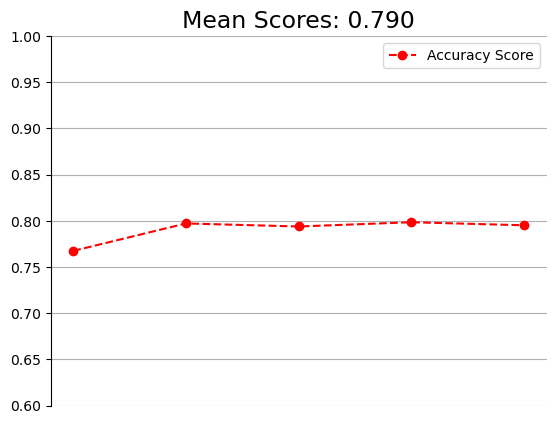

In [49]:
fig, ax = plt.subplots()

ax.plot(scores_lr, 'o--r', label='Accuracy Score')

ax.set_title(f'Mean Scores: {np.mean(scores_lr):.3f}', fontsize=17)

ax.spines[['top', 'right', 'bottom']].set_visible(False)
ax.set_ylim(0.6, 1)
ax.xaxis.set_visible(False)
ax.legend()

plt.grid()
plt.show()

In [50]:
y_pred_lr = clf_lr.predict(X_test)

In [51]:
cm_lr = confusion_matrix(y_pred=y_pred_lr, y_true=y_test)

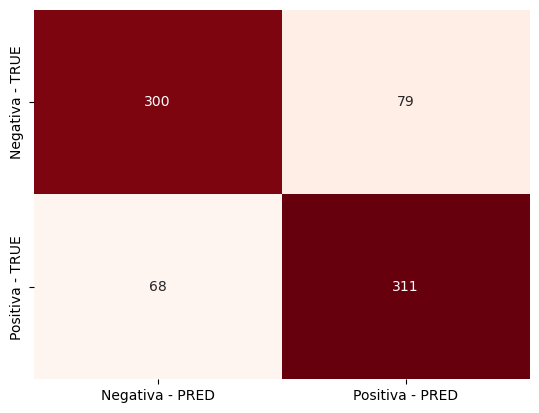

In [52]:
fig, ax = plt.subplots()

sns.heatmap(cm_lr, ax=ax, cmap='Reds', annot=True, fmt='g', cbar=False,
            xticklabels=['Negativa - PRED', 'Positiva - PRED'],
            yticklabels=['Negativa - TRUE', 'Positiva - TRUE'])

plt.show()

In [53]:
models_evaluation = concat_evaluations(models_evaluation, y_pred_lr, 'LogisticRegression')

<h3 style='color: #1fd655; text-align: left; font-size: 1.35em;'>Random Forest</h3>

In [54]:
rf_params = {
    "n_estimators": [70, 90, 110],
    "criterion": ['gini', 'entropy'],
    'min_samples_split': [2, 3, 5]
}

In [55]:
clf_rf = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=rf_params,
    scoring='accuracy',
    cv=kf
)

clf_rf.fit(X_train, y_train)

print(f"Melhores Hiperparâmetros da Floresta Aleatória: \n{clf_rf.best_estimator_}")

Melhores Hiperparâmetros da Floresta Aleatória: 
RandomForestClassifier(n_estimators=70)


In [56]:
scores_rf = cross_val_score(clf_rf, X_train, y_train, cv=kf, scoring='accuracy')

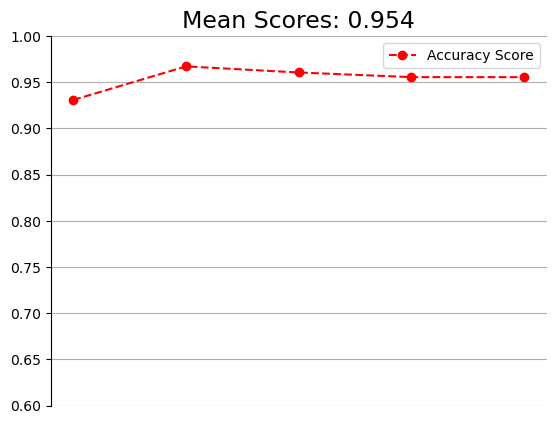

In [57]:
fig, ax = plt.subplots()

ax.plot(scores_rf, 'o--r', label='Accuracy Score')

ax.set_title(f'Mean Scores: {np.mean(scores_rf):.3f}', fontsize=17)

ax.spines[['top', 'right', 'bottom']].set_visible(False)
ax.set_ylim(0.6, 1)
ax.xaxis.set_visible(False)
ax.legend()

plt.grid()
plt.show()

In [58]:
y_pred_rf = clf_rf.predict(X_test)

In [59]:
cm_rf = confusion_matrix(y_pred=y_pred_rf, y_true=y_test)

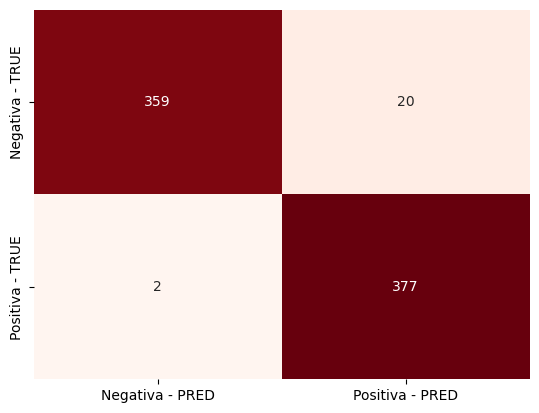

In [60]:
fig, ax = plt.subplots()

sns.heatmap(cm_rf, ax=ax, cmap='Reds', annot=True, fmt='g', cbar=False,
            xticklabels=['Negativa - PRED', 'Positiva - PRED'],
            yticklabels=['Negativa - TRUE', 'Positiva - TRUE'])

plt.show()

In [61]:
models_evaluation = concat_evaluations(models_evaluation, y_pred_rf, 'RandomForest')

<h3 style='color: #1fd655; text-align: left; font-size: 1.35em;'>KNN</h3>

In [62]:
knn_params = {
    "n_neighbors": [3, 5, 10],
    "weights": ['uniform', 'distance']
}

In [63]:
clf_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=knn_params,
    scoring='accuracy',
    cv=kf
)

clf_knn.fit(X_train, y_train)

print(f"Melhores hiperparâmetros do KNN: \n{clf_knn.best_estimator_}")

Melhores hiperparâmetros do KNN: 
KNeighborsClassifier(n_neighbors=3, weights='distance')


In [64]:
scores_knn = cross_val_score(clf_knn, X_train, y_train, cv=kf, scoring='accuracy')

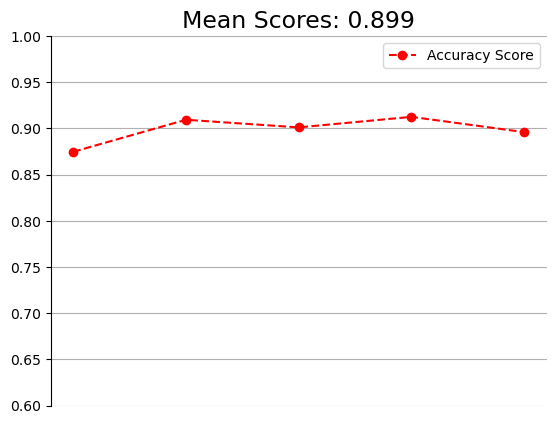

In [65]:
fig, ax = plt.subplots()

ax.plot(scores_knn, 'o--r', label='Accuracy Score')

ax.set_title(f'Mean Scores: {np.mean(scores_knn):.3f}', fontsize=17)

ax.spines[['top', 'right', 'bottom']].set_visible(False)
ax.set_ylim(0.6, 1)
ax.xaxis.set_visible(False)
ax.legend()

plt.grid()
plt.show()

In [66]:
y_pred_knn = clf_knn.predict(X_test)

In [67]:
cm_knn = confusion_matrix(y_pred=y_pred_knn, y_true=y_test)

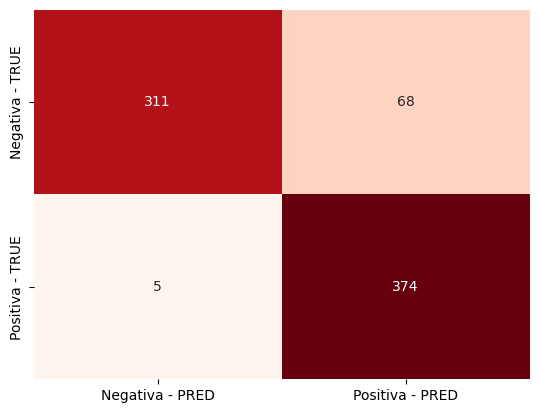

In [68]:
fig, ax = plt.subplots()

sns.heatmap(cm_knn, ax=ax, cmap='Reds', annot=True, fmt='g', cbar=False,
            xticklabels=['Negativa - PRED', 'Positiva - PRED'],
            yticklabels=['Negativa - TRUE', 'Positiva - TRUE'])

plt.show()

In [69]:
models_evaluation = concat_evaluations(models_evaluation, y_pred_knn, 'KNN')

<h3 style='color: #1fd655; text-align: left; font-size: 1.35em;'>SVC</h3>

In [70]:
svc_params = {
    "C": [0.01, 0.1, 1, 10],
    "gamma": ['scale', 'auto']
}

In [71]:
clf_svc = GridSearchCV(
    estimator=SVC(),
    param_grid=svc_params,
    scoring='accuracy',
    cv=kf
)

clf_svc.fit(X_train, y_train)

print(f"Melhores hiperparâmetros do SVC: \n{clf_svc.best_estimator_}")

Melhores hiperparâmetros do SVC: 
SVC(C=10, gamma='auto')


In [72]:
scores_svc = cross_val_score(clf_svc, X_train, y_train, cv=kf, scoring='accuracy')

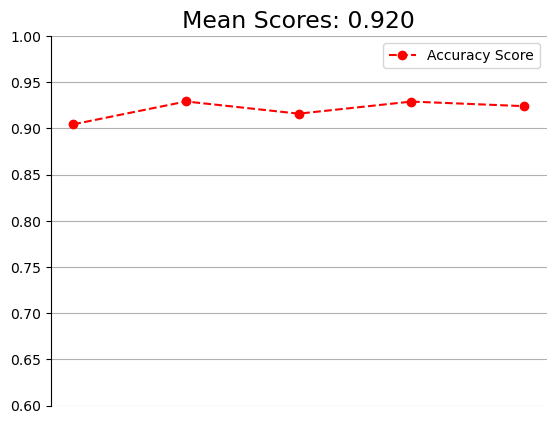

In [73]:
fig, ax = plt.subplots()

ax.plot(scores_svc, 'o--r', label='Accuracy Score')

ax.set_title(f'Mean Scores: {np.mean(scores_svc):.3f}', fontsize=17)

ax.spines[['top', 'right', 'bottom']].set_visible(False)
ax.set_ylim(0.6, 1)
ax.xaxis.set_visible(False)
ax.legend()

plt.grid()
plt.show()

In [74]:
y_pred_svc = clf_svc.predict(X_test)

In [75]:
cm_svc = confusion_matrix(y_pred=y_pred_svc, y_true=y_test)

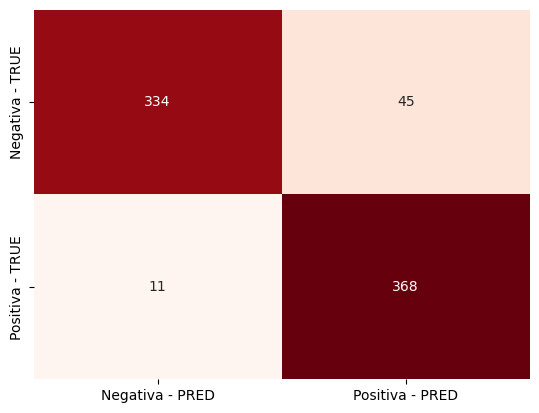

In [76]:
fig, ax = plt.subplots()

sns.heatmap(cm_svc, ax=ax, cmap='Reds', annot=True, fmt='g', cbar=False,
            xticklabels=['Negativa - PRED', 'Positiva - PRED'],
            yticklabels=['Negativa - TRUE', 'Positiva - TRUE'])

plt.show()

In [77]:
models_evaluation = concat_evaluations(models_evaluation, y_pred_svc, 'SVC')

In [78]:
models_evaluation.sort_values(by='Accuracy', ascending=False)

,Model,Precision,Recall,Accuracy
2,RandomForest,0.949622,0.994723,0.970976
0,DecisionTree,0.884161,0.986807,0.928760
4,SVC,0.891041,0.970976,0.926121
3,KNN,0.846154,0.986807,0.903694
1,LogisticRegression,0.797436,0.820580,0.806069


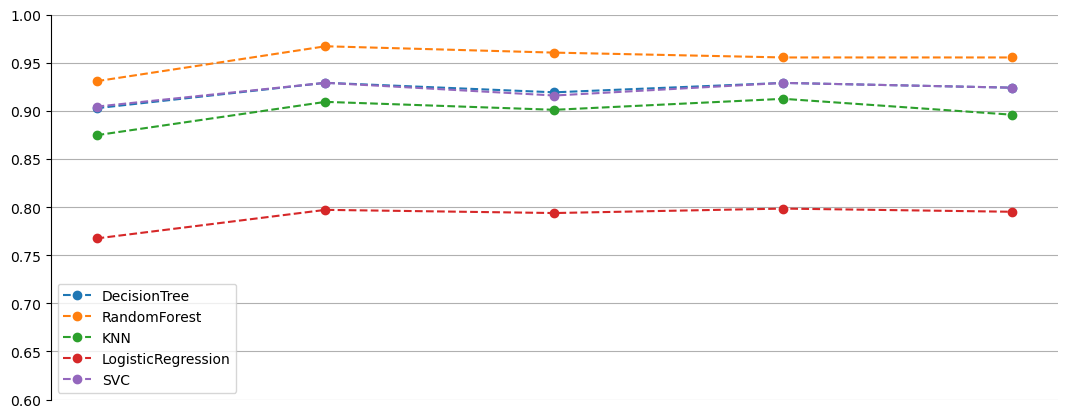

In [79]:
fig, ax = plt.subplots(figsize=(13, 5))

ax.plot(scores_tree, 'o--', label='DecisionTree')
ax.plot(scores_rf, 'o--', label='RandomForest')
ax.plot(scores_knn, 'o--', label='KNN')
ax.plot(scores_lr, 'o--', label='LogisticRegression')
ax.plot(scores_svc, 'o--', label='SVC')

ax.spines[['top', 'right', 'bottom']].set_visible(False)
ax.set_ylim(0.6, 1)
ax.xaxis.set_visible(False)
ax.legend()

plt.grid()
plt.show()

<ul>
    <li><p style='font-size: 13px; font-family: Andale Mono, Verdana, sans-serif;'>O modelo que apresentou o melhor desempenho no conjunto de dados foi claramente o <strong style='color: green;'>Random Forest</strong>.</p></li>
    <li><p style='font-size: 13px; font-family: Andale Mono, Verdana, sans-serif;'>Em contraste, a <strong style='color: green;'>Regressão Logística</strong> demonstrou o pior desempenho entre os demais.</p></li>
</ul>
